In [369]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
from typing import Optional 
from unopt import *
import copy
import time
from sklearn.cluster import KMeans

np.random.seed(0)
n_samples = 100
random_state = 3


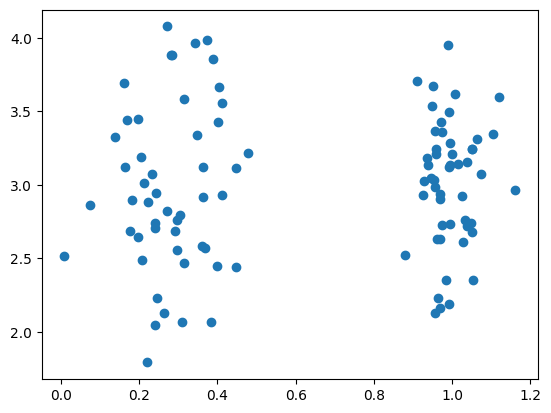

In [371]:
centers = np.array([(0.3, 3), (1, 3)])
blobs = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=[(0.1, 0.5), (0.06, 0.5)],
    random_state=random_state
)
dataset = blobs[0] 
plt.scatter(dataset[:, 0], dataset[:, 1], marker='o')

In [301]:
def k_means(dataset, k = None, centers = None):
    next_centers = unwrap_or(
        centers,
        np.column_stack([
            np.random.uniform(np.min(dataset[:, 0]), np.max(dataset[:, 0]), size=2),
            np.random.uniform(np.min(dataset[:, 1]), np.max(dataset[:, 1]), size=2)
        ])
    )

    dim = dataset[1].size
    k = len(next_centers)
    
    prev_centers = np.empty(dim)
    # plt.scatter(next_centers[0, 0], next_centers[0, 1], color="grey", marker='o')
    # plt.scatter(next_centers[1, 0], next_centers[1, 1], color="black", marker='o')
    while True:
        if (next_centers == prev_centers).all():
            break

        prev_centers = copy.deepcopy(next_centers)

        clusters = [[] for i in range(k)]

        for x in dataset:
            min_index = 0
            for i in range(1, k):
                if np.linalg.norm(x - prev_centers[i]) <  np.linalg.norm(x - prev_centers[min_index]): 
                    min_index = i
            clusters[min_index].append(x)
        
        for i in range(k):
            N = len(clusters[i])
            x_sum = np.array(clusters[i])
            next_centers[i] = np.multiply(1.0 / N, np.sum(x_sum, axis=0))

    plt.scatter(np.array(clusters[0])[:, 0], np.array(clusters[0])[:, 1], color = "blue", marker='.')
    plt.scatter(next_centers[0, 0], next_centers[0, 1], color="blue", marker='o')

    plt.scatter(np.array(clusters[1])[:, 0], np.array(clusters[1])[:, 1], color = "green", marker='.')
    plt.scatter(next_centers[1, 0], next_centers[1, 1], color="green", marker='o')
        

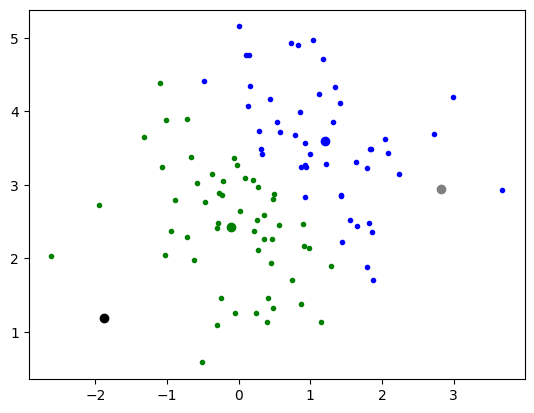

In [289]:
k_means(dataset=dataset)

# Меняем значения центров

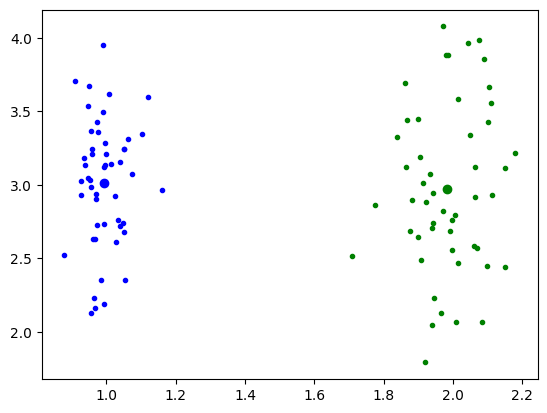

In [312]:
centers = np.array([(2, 3), (1, 3)])
blobs = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=[(0.1, 0.5), (0.06, 0.5)],
    random_state=random_state
)

dataset = blobs[0] 
k_means(dataset=dataset)

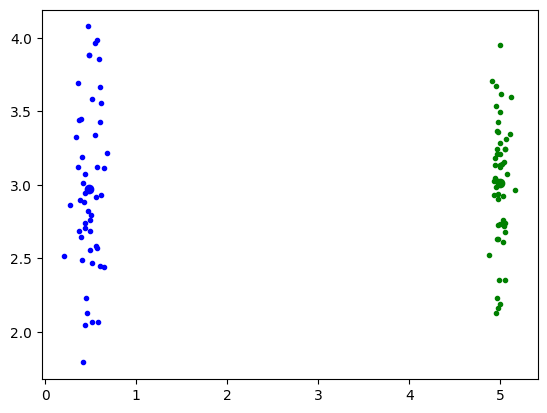

In [342]:
centers = np.array([(0.5, 3), (5, 3)])
blobs = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=[(0.1, 0.5), (0.06, 0.5)],
    random_state=random_state
)

dataset = blobs[0] 
k_means(dataset=dataset)

# Меняем параметр, чтобы k_means работал правильно

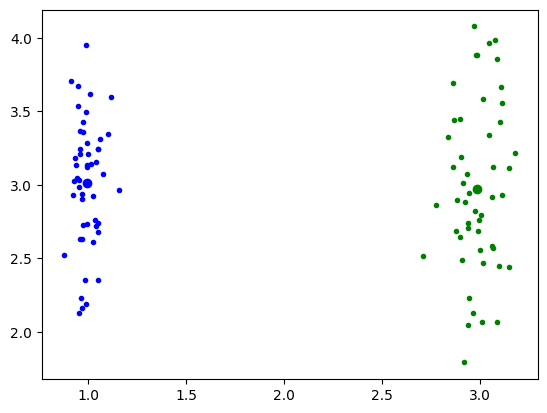

In [384]:
centers = np.array([(3, 3), (1, 3)])
blobs = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=[(0.1, 0.5), (0.06, 0.5)],
    random_state=random_state
)

dataset = blobs[0] 
k_means(dataset=dataset)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


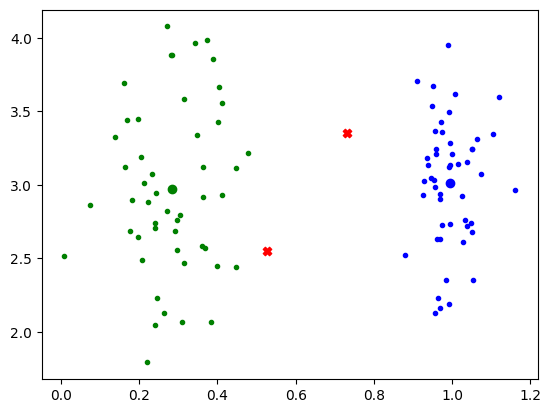

In [402]:
centers = np.array([(0.3, 3), (1, 3)])
blobs = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=[(0.1, 0.5), (0.06, 0.5)],
    random_state=random_state
)

dataset = blobs[0] 
k_means(dataset=dataset)

kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset)
scikit_centers = kmeans.cluster_centers_
plt.scatter(scikit_centers[:, 0], scikit_centers[:, 1], marker='X', color='red')

InvalidParameterError: The 'init' parameter of KMeans must be a str among {'random', 'k-means++'}, a callable or an array-like. Got 'kmeans++' instead.

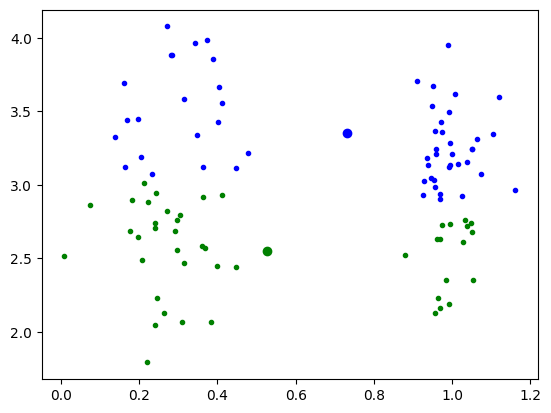

In [404]:
centers = np.array([(0.3, 3), (1, 3)])
blobs = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=[(0.1, 0.5), (0.06, 0.5)],
    random_state=random_state
)

dataset = blobs[0] 
k_means(dataset=dataset)

kmeans = KMeans(n_clusters=2, init='kmeans++')
kmeans.fit(dataset)
scikit_centers = kmeans.cluster_centers_
plt.scatter(scikit_centers[:, 0], scikit_centers[:, 1], marker='X', color='red')